In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv("ASPR_Treatments.csv")

data

/tmp/ipykernel_960/3987637680.py:7: DtypeWarning: Columns (12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("ASPR_Treatments.csv")


,Provider Name,Address 1,Address 2,City,State,Zip,Public Phone,Latitude,Longitude,Geopoint,...,Has Veklury,Has Oseltamivir Generic,Has Oseltamivir Suspension,Has Oseltamivir Tamiflu,Has Baloxavir,Has Zanamivir,Has Peramivir,Grantee Code,Is Flu,Is COVID-19
0,CVS PHARMACY #05246,110 HWY 98,NaN,PORT SAINT JOE,FL,32456,NaN,30.016430,-85.430510,POINT (-85.43051 30.01643),...,False,False,False,False,False,False,False,CV1,False,True
1,PUBLIX PHARMACY #0567,2517 SOUTH FEDERAL HIGHWAY,NaN,FT PIERCE,FL,34982,NaN,27.319630,-80.316317,POINT (-80.316317 27.31963),...,False,False,False,False,False,False,False,PX1,False,True
2,WALGREENS #4379,4320 26TH ST W,NaN,BRADENTON,FL,34205-3563,941-755-8596,27.462954,-82.588373,POINT (-82.588373 27.462954),...,False,True,False,False,False,False,False,WG1,True,True
3,PUBLIX PHARMACY #0894,6820 OKEECHOBEE BLVD,NaN,WEST PALM BEACH,FL,33411,NaN,26.705894,-80.150789,POINT (-80.150789 26.705894),...,False,False,False,False,False,False,False,PX1,False,True
4,PUBLIX PHARMACY #0019,731 DUVAL STATION RD SUITE 4,NaN,JACKSONVILLE,FL,32218,NaN,30.485316,-81.604614,POINT (-81.604614 30.485316),...,False,False,False,False,False,False,False,PX1,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65843,CVS PHARMACY #10415,800 MAINE AVE SW UNIT,NaN,WASHINGTON,DC,20024-2494,NaN,38.880747,-77.026821,POINT (-77.026821 38.880747),...,False,False,False,False,False,False,False,CV1,False,True
65844,PILL PLUS PHARMACY,4215 CONNECTICUT AVE NW # ST1,NaN,WASHINGTON,DC,20008-1159,NaN,38.943706,-77.062826,POINT (-77.062826 38.943706),...,False,False,False,False,False,False,False,NaN,False,True
65845,HEALING TOUCH PHARMACY 03,3415 23RD ST SE,NaN,WASHINGTON,DC,20020-1921,NaN,38.847577,-76.971292,POINT (-76.971292 38.847577),...,False,False,False,False,False,False,False,NaN,False,True
65846,AHF PHARMACY,650 PENNSYLVANIA AVE SE,STE 380,WASHINGTON,DC,20003,NaN,38.885394,-76.996977,POINT (-76.996977 38.885394),...,False,False,False,False,False,False,False,NaN,False,True


In [10]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65848 entries, 0 to 65847
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Provider Name                   65848 non-null  object 
 1   Address 1                       65847 non-null  object 
 2   Address 2                       7373 non-null   object 
 3   City                            65847 non-null  object 
 4   State                           65847 non-null  object 
 5   Zip                             65847 non-null  object 
 6   Public Phone                    20559 non-null  object 
 7   Latitude                        65848 non-null  float64
 8   Longitude                       65848 non-null  float64
 9   Geopoint                        65848 non-null  object 
 10  Last Report Date                65847 non-null  object 
 11  Is PAP Site                     65848 non-null  bool   
 12  Prescribing Services Available  

In [11]:
data.drop(columns = ['Last Report Date','Address 1','Provider Name','Address 2', 'City' ,'State', 'Zip', 'Public Phone', 'Latitude', 'Longitude','Geopoint', 'Grantee Code', 'Appointment URL','Home Delivery','Prescribing Services Available'], inplace=True)

data

,Is PAP Site,Is ICATT Site,Has USG Product,Has Commercial Product,Has Paxlovid,Has Commercial Paxlovid,Has USG Paxlovid,Has Lagevrio,Has Commercial Lagevrio,Has USG Lagevrio,Has Veklury,Has Oseltamivir Generic,Has Oseltamivir Suspension,Has Oseltamivir Tamiflu,Has Baloxavir,Has Zanamivir,Has Peramivir,Is Flu,Is COVID-19
0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True
3,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65843,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
65844,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
65845,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
65846,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [12]:
data.isnull().sum()

Is PAP Site                   0
Is ICATT Site                 0
Has USG Product               0
Has Commercial Product        0
Has Paxlovid                  0
Has Commercial Paxlovid       0
Has USG Paxlovid              0
Has Lagevrio                  0
Has Commercial Lagevrio       0
Has USG Lagevrio              0
Has Veklury                   0
Has Oseltamivir Generic       0
Has Oseltamivir Suspension    0
Has Oseltamivir Tamiflu       0
Has Baloxavir                 0
Has Zanamivir                 0
Has Peramivir                 0
Is Flu                        0
Is COVID-19                   0
dtype: int64

In [13]:
label = LabelEncoder()
data["Is COVID-19"] = label.fit_transform(data['Is COVID-19'])

label

LabelEncoder()

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65848 entries, 0 to 65847
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Is PAP Site                 65848 non-null  bool 
 1   Is ICATT Site               65848 non-null  bool 
 2   Has USG Product             65848 non-null  bool 
 3   Has Commercial Product      65848 non-null  bool 
 4   Has Paxlovid                65848 non-null  bool 
 5   Has Commercial Paxlovid     65848 non-null  bool 
 6   Has USG Paxlovid            65848 non-null  bool 
 7   Has Lagevrio                65848 non-null  bool 
 8   Has Commercial Lagevrio     65848 non-null  bool 
 9   Has USG Lagevrio            65848 non-null  bool 
 10  Has Veklury                 65848 non-null  bool 
 11  Has Oseltamivir Generic     65848 non-null  bool 
 12  Has Oseltamivir Suspension  65848 non-null  bool 
 13  Has Oseltamivir Tamiflu     65848 non-null  bool 
 14  Has Ba

In [15]:
# Sampling

In [16]:
data_under = data[data["Is COVID-19"] == True]

true_700 = data_under.sample(n=700)

true_700.shape

(700, 19)

In [17]:
data_minor = data[data["Is COVID-19"] == False]

data_minor.shape

(713, 19)

In [18]:
sample_data = pd.concat([true_700, data_minor], axis = 0)

sample_data.head()

,Is PAP Site,Is ICATT Site,Has USG Product,Has Commercial Product,Has Paxlovid,Has Commercial Paxlovid,Has USG Paxlovid,Has Lagevrio,Has Commercial Lagevrio,Has USG Lagevrio,Has Veklury,Has Oseltamivir Generic,Has Oseltamivir Suspension,Has Oseltamivir Tamiflu,Has Baloxavir,Has Zanamivir,Has Peramivir,Is Flu,Is COVID-19
53836,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1
36093,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1
14566,True,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,True,1
43026,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1
26996,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1


In [19]:
sample_data = sample_data.set_index(np.arange(sample_data.shape[0]))

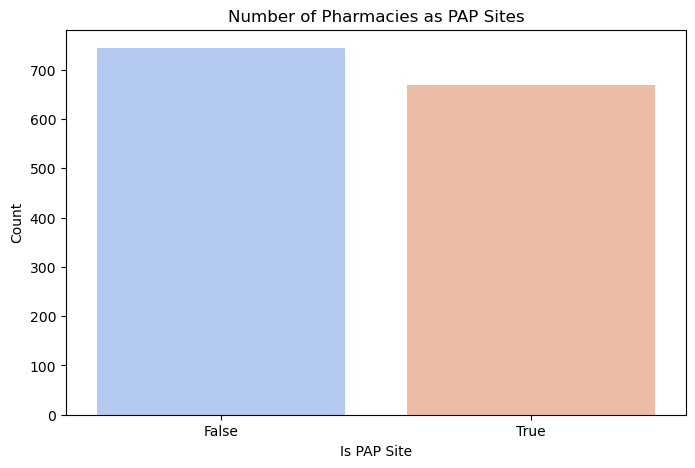

In [20]:
# Model
plt.figure(figsize=(8, 5))
sns.countplot(x="Is PAP Site", data=sample_data, palette="coolwarm")
plt.title("Number of Pharmacies as PAP Sites")
plt.xlabel("Is PAP Site")
plt.ylabel("Count")
plt.show()


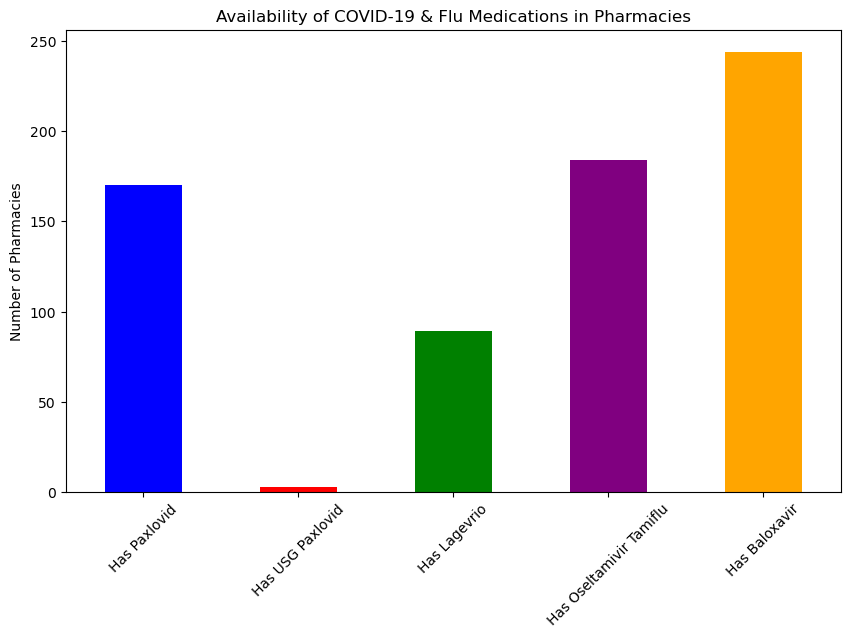

In [21]:
product_columns = [
    "Has Paxlovid", "Has USG Paxlovid", "Has Lagevrio",
    "Has Oseltamivir Tamiflu", "Has Baloxavir"
]

plt.figure(figsize=(10, 6))
sample_data[product_columns].sum().plot(kind='bar', color=['blue', 'red', 'green', 'purple', 'orange'])
plt.title("Availability of COVID-19 & Flu Medications in Pharmacies")
plt.ylabel("Number of Pharmacies")
plt.xticks(rotation=45)
plt.show()

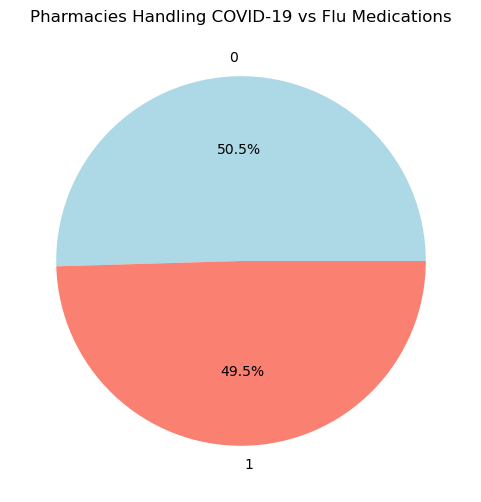

In [22]:
plt.figure(figsize=(6, 6))
sample_data["Is COVID-19"].value_counts().plot.pie(autopct="%1.1f%%", colors=['lightblue', 'salmon'])
plt.title("Pharmacies Handling COVID-19 vs Flu Medications")
plt.ylabel("")  # Hide y-label
plt.show()


/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


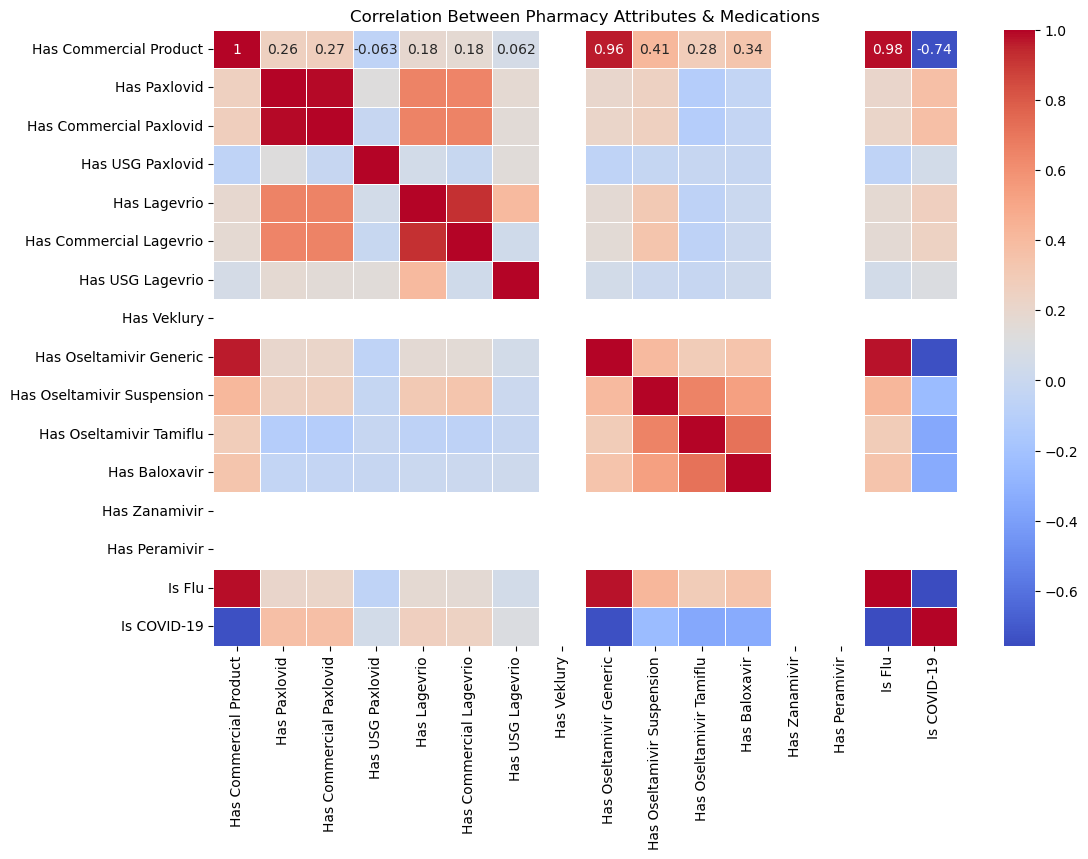

In [23]:
plt.figure(figsize=(12, 8))
sns.heatmap(sample_data.iloc[:, 3:].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Between Pharmacy Attributes & Medications")
plt.show()


In [24]:
# suffle the dataset

data_shuffled = sample_data.sample(frac=1, random_state=42).reset_index(drop=True)

In [25]:
data_shuffled.head()

,Is PAP Site,Is ICATT Site,Has USG Product,Has Commercial Product,Has Paxlovid,Has Commercial Paxlovid,Has USG Paxlovid,Has Lagevrio,Has Commercial Lagevrio,Has USG Lagevrio,Has Veklury,Has Oseltamivir Generic,Has Oseltamivir Suspension,Has Oseltamivir Tamiflu,Has Baloxavir,Has Zanamivir,Has Peramivir,Is Flu,Is COVID-19
0,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,True,0
1,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,0
2,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1
3,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1
4,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1


In [26]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC

x = data_shuffled.drop("Is COVID-19",axis = 1)
y = data_shuffled["Is COVID-19"]


In [27]:
# Tran Test + Again Shuffling and sampling for safty

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y, shuffle = True)




In [28]:
# Scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [86]:
# Model

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

data_model = DecisionTreeClassifier(max_depth=3, random_state=42)
data_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [88]:
# Predictions

y_pred = data_model.predict(x_test)

y_pred

array([0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0])

In [90]:
# Evaluate 

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       143
           1       1.00      1.00      1.00       140

    accuracy                           1.00       283
   macro avg       1.00      1.00      1.00       283
weighted avg       1.00      1.00      1.00       283

Confusion Matrix:
[[143   0]
 [  0 140]]


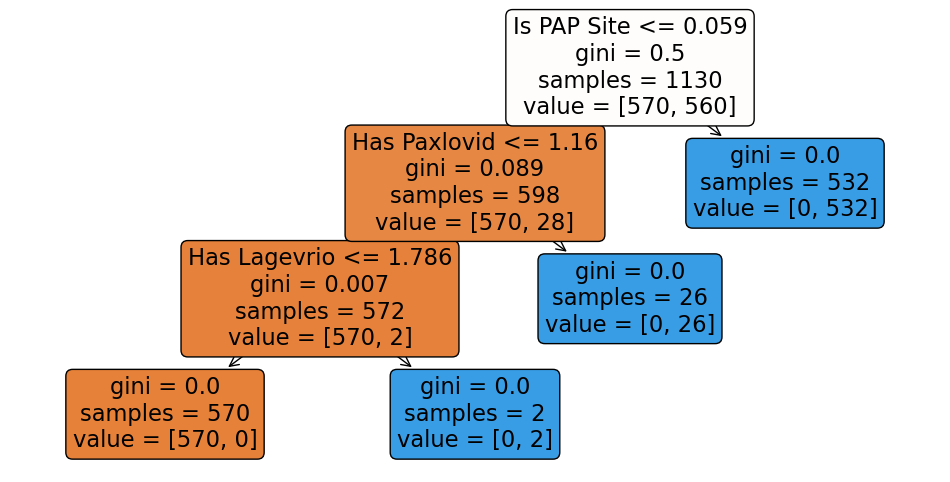

In [92]:
# Desision tree

from sklearn.tree import plot_tree

plt.figure(figsize=(12, 6))
plot_tree(data_model, feature_names=list(x.columns), filled=True, rounded=True)
plt.show()

In [100]:
# Hyperparameter Tuning

param_grid = {
    'max_depth': [2, 3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(x_train, y_train)

print("Best Parameters:", grid_search.best_params_)
best_dt = grid_search.best_estimator_

Best Parameters: {'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}
